In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset yang Digunakan**

In [ ]:
control = pd.read_csv('/content/drive/MyDrive/StartupCampus/Example Dataset for AB Test/control_group.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/StartupCampus/Example Dataset for AB Test/test_group.csv', sep=';')

In [ ]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


# **Mengubah Format Penulisan Judul Kolom**

In [ ]:
def to_clean(val):
    return val.strip().lower().replace("# ", "").replace("of ", "").replace(" ","_").replace("[usd]", "usd")

In [ ]:
control.rename(columns=to_clean, inplace= True)
test.rename(columns=to_clean, inplace= True)

In [ ]:
control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Cleansing Data**

## Null Values treatment

In [ ]:
control.isna().sum()

campaign_name     0
date              0
spend_usd         0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
dtype: int64

In [ ]:
test.isna().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [ ]:
# control[control.isnull().any(axis= 1)]

In [ ]:
# control.dropna(inplace= True)

In [ ]:
control['impressions'].fillna(int(control['impressions'].mean()), inplace=True)
control['reach'].fillna(int(control['reach'].mean()), inplace=True)
control['website_clicks'].fillna(int(control['website_clicks'].mean()), inplace=True)
control['searches'].fillna(int(control['searches'].mean()), inplace=True)
control['view_content'].fillna(int(control['view_content'].mean()), inplace=True)
control['add_to_cart'].fillna(int(control['add_to_cart'].mean()), inplace=True)
control['purchase'].fillna(int(control['purchase'].mean()), inplace=True)

In [ ]:
control.isna().sum()

campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
dtype: int64

In [ ]:
control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,109559.0,88844.0,5320.0,2221.0,1943.0,1300.0,522.0


## Duplicated Values Treatment

In [ ]:
# Check duplicate data
control[control.duplicated()]

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase


In [ ]:
# Check duplicate data
test[test.duplicated()]

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase


# **Menambahkan Atribut Baru**

Fitur Yang Ditambahkan:
* USD Spend per Purchase
* CTR (Click Through Rate)(in %)
* Conversion rate (in %)

## Menggabung Dataset Control dan Test

In [ ]:
control['usd_spend_per_purchase'] = round(control['spend_usd']/control['purchase'],2)
control['CTR(%)'] = round(control['website_clicks']*100/control['impressions'],2)
control['conversion_rate(%)'] = round(control['purchase']*100/control['website_clicks'],2)
control.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,usd_spend_per_purchase,CTR(%),conversion_rate(%)
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,3.69,8.48,8.81
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,3.44,6.70,6.30
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,6.30,4.94,5.72
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,5.71,4.21,11.09
4,Control Campaign,5.08.2019,1835,109559.0,88844.0,5320.0,2221.0,1943.0,1300.0,522.0,3.52,4.86,9.81


In [ ]:
test['usd_spend_per_purchase'] = round(test['spend_usd']/test['purchase'],2)
test['CTR(%)'] = round(test['website_clicks']*100/test['impressions'],2)
test['conversion_rate(%)'] = round(test['purchase']*100/test['website_clicks'],2)
test.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,usd_spend_per_purchase,CTR(%),conversion_rate(%)
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255,11.80,7.68,8.39
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677,3.75,4.62,14.54
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578,4.09,11.22,7.33
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340,7.97,5.37,8.06
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768,2.99,5.13,13.10


In [ ]:
df = control.merge(test, how='outer').sort_values(['date']).reset_index(drop= True)
df

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,usd_spend_per_purchase,CTR(%),conversion_rate(%)
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,3.69,8.48,8.81
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0,11.80,7.68,8.39
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0,10.15,8.55,3.38
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,2.93,1.94,32.24
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0,3.62,4.48,17.81
5,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0,5.24,7.06,5.84
6,Test Campaign,12.08.2019,2831,124591.0,10598.0,8264.0,2081.0,1992.0,1382.0,709.0,3.99,6.63,8.58
7,Control Campaign,12.08.2019,2319,116639.0,100189.0,2993.0,1397.0,1147.0,1439.0,794.0,2.92,2.57,26.53
8,Test Campaign,13.08.2019,1972,65827.0,49531.0,7568.0,2213.0,2058.0,1391.0,812.0,2.43,11.50,10.73
9,Control Campaign,13.08.2019,2697,82847.0,68214.0,6554.0,2390.0,1975.0,1794.0,766.0,3.52,7.91,11.69


In [ ]:
# df['usd_spend_per_purchase'] = round(df['spend_usd']/df['purchase'],2)
# df['CTR(%)'] = round(df['website_clicks']*100/df['impressions'],2)
# df['conversion_rate(%)'] = round(df['purchase']*100/df['website_clicks'],2)
# df.head()

# **Basic EDA**

## Spend USD Per Campaign

In [ ]:
df.groupby(['campaign_name'])[['spend_usd']].sum()

,spend_usd
campaign_name,
Control Campaign,68653
Test Campaign,76892


## Impressions Per Campaign

In [ ]:
df.groupby(['campaign_name'])[['impressions']].sum()

,impressions
campaign_name,
Control Campaign,3286792.0
Test Campaign,2237544.0


## Reach Per Campaign

In [ ]:
df.groupby(['campaign_name'])[['reach']].sum()

,reach
campaign_name,
Control Campaign,2665347.0
Test Campaign,1604747.0


## Website Clicks Per Campaign

In [ ]:
df.groupby(['campaign_name'])[['website_clicks']].sum()

,website_clicks
campaign_name,
Control Campaign,159623.0
Test Campaign,180970.0


## Purchase Per Campaign

In [ ]:
df.groupby(['campaign_name'])[['purchase']].sum()

,purchase
campaign_name,
Control Campaign,15683.0
Test Campaign,15637.0


## USDPP Per Campaign

In [ ]:
usdpp = df.groupby(['campaign_name'])[['usd_spend_per_purchase']].sum()
usdpp

,usd_spend_per_purchase
campaign_name,
Control Campaign,150.05
Test Campaign,177.00


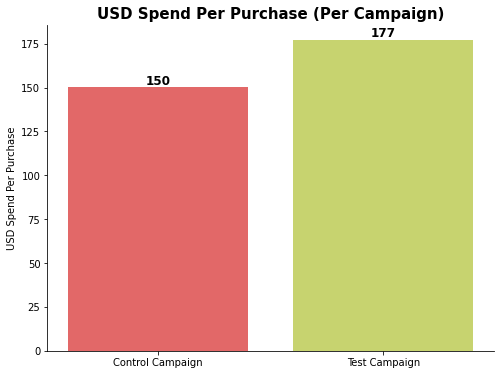

In [ ]:
usdpp = df.groupby(['campaign_name'])[['usd_spend_per_purchase']].sum()

warna = ["#E26868","#C7D36F"]

x = usdpp['usd_spend_per_purchase'].index
y = usdpp['usd_spend_per_purchase'].values

f,ax=plt.subplots(figsize=(8,6))
plt.bar(x, y, color=warna)

# Sum up the rows of our data to get the total value of each bar.
totals = usdpp.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold', va='center' ,fontsize=12)


plt.xticks()
plt.title("USD Spend Per Purchase (Per Campaign)",size=15,  weight='bold')
plt.ylabel('USD Spend Per Purchase')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## CTR Per Campaign

In [ ]:
ctrpc = df.groupby(['campaign_name'])[['CTR(%)']].sum()
ctrpc

,CTR(%)
campaign_name,
Control Campaign,152.63
Test Campaign,307.25


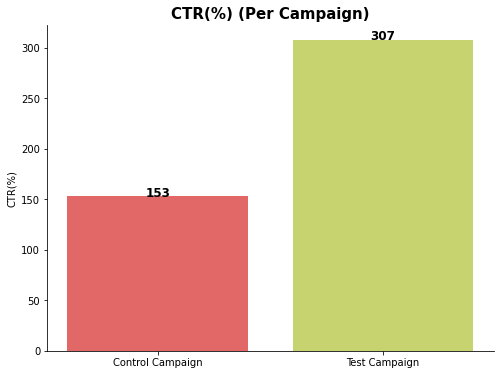

In [ ]:
ctrpc = df.groupby(['campaign_name'])[['CTR(%)']].sum()

warna = ["#E26868","#C7D36F"]

x = ctrpc['CTR(%)'].index
y = ctrpc['CTR(%)'].values

f,ax=plt.subplots(figsize=(8,6))
plt.bar(x, y, color=warna)

# Sum up the rows of our data to get the total value of each bar.
totals = ctrpc.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold', va='center' ,fontsize=12)


plt.xticks()
plt.title("CTR(%) (Per Campaign)",size=15,  weight='bold')
plt.ylabel('CTR(%)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

## Conversion Rate Per Purchase

In [ ]:
crpp = df.groupby(['campaign_name'])[['conversion_rate(%)']].sum()
crpp

,conversion_rate(%)
campaign_name,
Control Campaign,342.66
Test Campaign,276.92


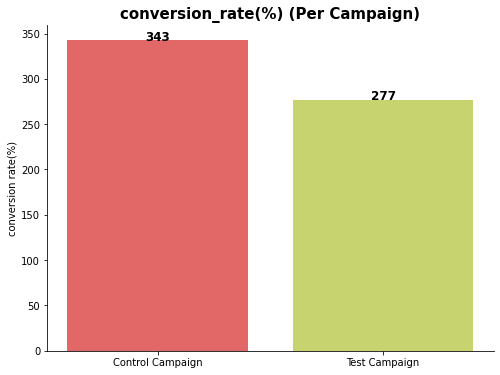

In [ ]:
crpp = df.groupby(['campaign_name'])[['conversion_rate(%)']].sum()

warna = ["#E26868","#C7D36F"]

x = crpp['conversion_rate(%)'].index
y = crpp['conversion_rate(%)'].values

f,ax=plt.subplots(figsize=(8,6))
plt.bar(x, y, color=warna)

# Sum up the rows of our data to get the total value of each bar.
totals = crpp.sum(axis=1)
# Set an offset that is used to bump the label up a bit above the bar.
y_offset = 4
# Add labels to each bar.
for i, total in enumerate(totals):
  ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold', va='center' ,fontsize=12)


plt.xticks()
plt.title("conversion_rate(%) (Per Campaign)",size=15,  weight='bold')
plt.ylabel('conversion rate(%)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# **Uji Hipotesis**
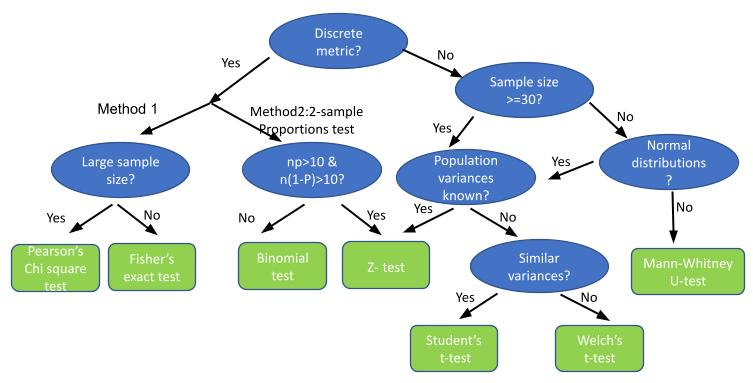

## Berdasarkan Conversion Rate

H0 : A  = B (Tidak ada perbedaan yang signifikan antara sampel fitur “maximum bidding” dengan sampel fitur “average bidding”)


H1 : A != B (Terdapat perbedaan yang signifikan antara sampel fitur “maximum bidding” dengan sampel fitur “average bidding”)

In [ ]:
# The ultimate success metric is Number of Conversion rate.
# focus on Conversion rate metrics for statistical testing.
A = pd.DataFrame(control["conversion_rate(%)"])
B = pd.DataFrame(test["conversion_rate(%)"])

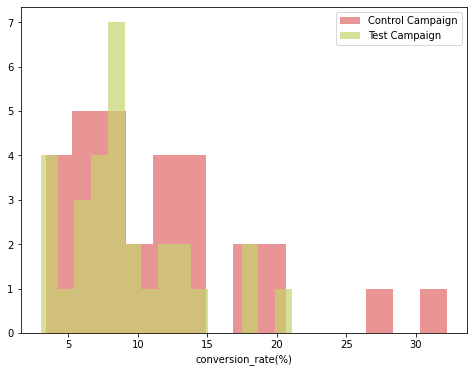

In [ ]:
# distribution of the Conversion rate for both groups
plt.figure(figsize=(8,6))

warna1 = ["#E26868"]
warna2 = ["#C7D36F"]

plt.xlabel('conversion_rate(%)')
plt.hist(control['conversion_rate(%)'],bins=15, alpha=0.7, label='Control Campaign', color=warna1)
plt.hist(test['conversion_rate(%)'],bins=15, alpha=0.7, label='Test Campaign', color=warna2)
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Combine the test and control group
AB = pd.concat([A,B],axis=1)
AB.columns=["A","B"]
AB.head

<bound method NDFrame.head of         A      B
0    8.81   8.39
1    6.30  14.54
2    5.72   7.33
3   11.09   8.06
4    9.81  13.10
5   18.97   6.52
6   18.90  21.09
7    6.36   6.00
8    8.08  10.23
9   32.24   3.38
10   5.84  17.81
11  26.53   8.58
12  11.69  10.73
13  17.43   8.51
14   7.48   7.97
15   8.38   7.16
16   3.35   3.01
17   3.35   3.72
18  14.62   6.72
19  11.60  12.07
20  14.06   4.48
21   5.66   6.23
22  17.37   9.32
23  14.32   3.76
24   9.12  18.10
25   4.62   7.43
26  12.24  11.98
27  10.23   8.85
28   4.11   8.85
29  14.38  13.00>

In [ ]:
print(" Mean of purchase of control group: %.3f"%AB.A.mean(),"\n",
      "Mean of purchase of test group: %.3f"%AB.B.mean())

 Mean of purchase of control group: 11.422 
 Mean of purchase of test group: 9.231


## Shapiro-Wilks Test untuk uji normalitas

In [ ]:
# Shapiro-Wilks Test  for Group A (control campaign)
test_statistic , pvalue = shapiro(AB.A)
print('Test statistic = %.4f, p-Value = %.4f'
      % (test_statistic, pvalue))

# karena p-value < 0,05, maka tidak berdistribusi normal

Test statistic = 0.8929, p-Value = 0.0057


In [ ]:
# Shapiro-Wilks Test  for Group B (test campaign)
test_statistic , pvalue = shapiro(AB.B)
print('Test statistic = %.4f, p-Value = %.4f'
      % (test_statistic, pvalue))

# karena p-value < 0,05, maka tidak berdistribusi normal

Test statistic = 0.9255, p-Value = 0.0373


## Levene's Test untuk uji kesamaan variansi

In [ ]:
# Levene's Test Between The Two Groups
test_statistic,pvalue = stats.levene(AB.A,AB.B)
print('Test statistic = %.4f, p-Value = %.4f'
      % (test_statistic, pvalue))

# # karena p-value > 0,05, maka variansi sama

Test statistic = 2.8638, p-Value = 0.0960


## Karena bukan distribusi normal dan variansinya sama, maka digunakan t-test untuk uji hipotesis

In [ ]:
tvalue, pvalue = stats.ttest_ind(AB["A"], AB["B"], equal_var=True)
print('tvalue = %.4f, pvalue = %.4f' % (tvalue, pvalue))

tvalue = 1.4882, pvalue = 0.1421


In [ ]:
if pvalue >= 0.05:
  print('H0 Diterima')
else:
  print('H0 Ditolak, dan H1 Diterima')

H0 Diterima
